<a href="https://colab.research.google.com/github/hut22929/pytorch-deep-learning/blob/master/simple_neuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import torch
import torch.nn as nn
import torch.nn.functional as F

Neural Network

In [64]:
# Create a Model Class that inherits nn.Module

class Model(nn.Module):
  # Input Layers ( 4 feature of flowers) -->
  # hidden layer1 (# of neurons) -->
  # H2 (# n) -->
  # Output (3 Class of flowers)
  def __init__(self, in_feature=4, h1=8, h2=9, out_feature=3):
    super().__init__()  # Need for call model = Model()
    #fc >>> Fully Connected
    self.fc1 = nn.Linear(in_feature, h1)
    self.fc2 = nn.Linear(h1, h2)
    #out >>> Output
    self.out = nn.Linear(h2, out_feature)

  # forward
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x


In [65]:
# Pick a manual seed forr randomization
torch.manual_seed(41)

# Create an instance of model
model = Model()

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [67]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)
#

In [68]:
my_df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [69]:
my_df['species'] = my_df['species'].astype('category')
my_df['species'] = my_df['species'].cat.codes


In [70]:

# Train Test Split , Set X, y
X = my_df.drop('species', axis=1).values
y = my_df['species'].values

ใช้ Numpy ใส่ ใน MOdel

In [71]:
# Convert these to numpy arrays
X = np.array(X)
y = np.array(y)
X.shape, y.shape

((150, 4), (150,))

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [74]:
# Convert X numpy feature to float tensor
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)  # Long are fix tensor value
y_test = torch.LongTensor(y_test)

In [75]:
# Set criterion of model to measure the error, how far off the predictions are from the data
# how close the prediction to the data
criterion = nn.CrossEntropyLoss()

# Choose Adam Optimizer , Learning Rate (lr) lower lr if error do not go down for a while

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [76]:
# Show model parameters
model

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [77]:
# Train our Model

# Epoc (one run thru all the trainiing data in our network)
epochs = 100
losses = []

for i in range(epochs):
  # Go forward and Get Prediction
  y_pred = model.forward(X_train)  # Get predicted result

  # Measure the loss/error, gonna be high and first

  loss = criterion(y_pred, y_train)  # predicted values VS the y_train

  # Keep Track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')



  # Do some back propagation: take the error rate of forward propagation and feed it back thru the network to fine tune the weight ( Learn better!)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.1251550912857056
Epoch: 10 and loss: 1.0096259117126465
Epoch: 20 and loss: 0.8157405853271484
Epoch: 30 and loss: 0.585706353187561
Epoch: 40 and loss: 0.3999636471271515
Epoch: 50 and loss: 0.26768800616264343
Epoch: 60 and loss: 0.17942361533641815
Epoch: 70 and loss: 0.12151690572500229
Epoch: 80 and loss: 0.0860118493437767
Epoch: 90 and loss: 0.06520850956439972


Text(0.5, 0, 'Epoch')

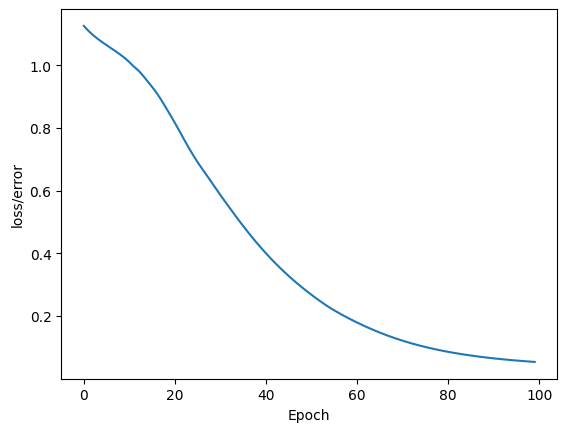

In [78]:
# Graph it out !
plt.plot(range(epochs), losses)
plt.ylabel('loss/error')
plt.xlabel('Epoch')